# Healthcare Analytics Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We have imported both the final csv files that we are going to use for the model.
- all_accelerometer_data_pids_13: contains accelerometer data
- combined_csv: contains TAC readings of all participants in one csv file that was created in separately

In [ ]:
xlo = pd.read_csv('all_accelerometer_data_pids_13.csv')

tac = pd.read_csv('combined_csv.csv')

In [ ]:
xlo.head()

,time,pid,x,y,z
0,0.000000e+00,JB3156,0.0000,0.0000,0.0000
1,0.000000e+00,CC6740,0.0000,0.0000,0.0000
2,1.493730e+12,SA0297,0.0758,0.0273,-0.0102
3,1.493730e+12,SA0297,-0.0359,0.0794,0.0037
4,1.493730e+12,SA0297,-0.2427,-0.0861,-0.0163


In [ ]:
tac.head()

,timestamp,TAC_Reading
0,1493718714,-0.000482
1,1493720697,0.001573
2,1493721027,0.002144
3,1493721357,0.000877
4,1493721686,-0.001145


Here we have created an empty dataframe and defined headers for our dataframe.

In [ ]:
column_names = ["x", "y", "z", "timestamp", "TAC_Reading"]

data = pd.DataFrame(columns = column_names)

We have taken the first 500 observations and stored it in the empty dataframe 

that we just created. The iloc method is used and the first parameter that extracts the rows from index 0 to 499 and the second parameter extracts columns as required.

In [ ]:
data['x'] = xlo.iloc[0:500,2]
data['y'] = xlo.iloc[0:500,3]
data['z'] = xlo.iloc[0:500,4]
data['timestamp'] = tac.iloc[0:500,0]
data['TAC_Reading'] = tac.iloc[0:500,1]

In [ ]:
data

,x,y,z,timestamp,TAC_Reading
0,0.0000,0.0000,0.0000,1493718714,-0.000482
1,0.0000,0.0000,0.0000,1493720697,0.001573
2,0.0758,0.0273,-0.0102,1493721027,0.002144
3,-0.0359,0.0794,0.0037,1493721357,0.000877
4,-0.2427,-0.0861,-0.0163,1493721686,-0.001145
...,...,...,...,...,...
495,0.0115,-0.0061,-0.0076,1493723802,-0.000398
496,-0.0033,0.0012,-0.0035,1493724122,0.001296
497,-0.0006,0.0040,-0.0037,1493724443,0.002063
498,0.2475,0.0111,-0.1883,1493724763,0.001177


In [ ]:
data['tac'] = data['TAC_Reading'].apply(lambda x: 0 if x <= 0.08 else 1)

In [ ]:
data

,x,y,z,timestamp,TAC_Reading,tac
0,0.0000,0.0000,0.0000,1493718714,-0.000482,0
1,0.0000,0.0000,0.0000,1493720697,0.001573,0
2,0.0758,0.0273,-0.0102,1493721027,0.002144,0
3,-0.0359,0.0794,0.0037,1493721357,0.000877,0
4,-0.2427,-0.0861,-0.0163,1493721686,-0.001145,0
...,...,...,...,...,...,...
495,0.0115,-0.0061,-0.0076,1493723802,-0.000398,0
496,-0.0033,0.0012,-0.0035,1493724122,0.001296,0
497,-0.0006,0.0040,-0.0037,1493724443,0.002063,0
498,0.2475,0.0111,-0.1883,1493724763,0.001177,0


Our final dataframe named data is ready to be used for creating the various machine learning models.

Selecting the columns for our features and target columns. TAC_Reading column is dropped as the tac column is derived from it to be the target column based on the above condition.

In [ ]:
X = data.iloc[:,0:5]
X = data.drop(['TAC_Reading','tac'],axis=1) 
y = data.iloc[:,5]

We are using train_test_split from model selection to split our data into training and test sets with 25% test size.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1011)

Scaling the data

In [ ]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
X_train_scl = robust.fit_transform(X_train)
X_test_scl = robust.transform(X_test)

Preparing for grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {'n_neighbors' : list(range(20,25)), # sqrt of 800 = 28 
                  'p' : [1,2]} 


param_grid_logreg = {'C' : [0.001,1,1000]}


param_grid_svm = {'C' : [0.001,1,1000],
                  'kernel' : ['linear', 'poly', 'rbf']}


param_grid_dtc = {'min_samples_split' : [2,3,4],
                  'max_depth' : [3,4,5],
                  'max_leaf_nodes':[5,10,20,25]}


param_grid_rfc = {'n_estimators' : [50,75,100],
                  'min_samples_split' : [2,3,4],
                  'max_depth' : [3,4,5],
                  'max_leaf_nodes':[5,10,20,25]}


param_grid_xgb = {'eta' : [0.2,0.3,0.4], # learning rate default value = 0.3
                  'gamma' : [0,1,100], # min_split_loss
                  'max_depth' : [4,5,6] }

Implementing various models

KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_jobs = -1) 
knn.fit(X_train_scl,y_train)

knn_train = knn.score(X_train_scl, y_train)
knn_test = knn.score(X_test_scl, y_test)

y_pred_knn = knn.predict(X_test_scl)
print(classification_report(y_test, y_pred_knn))

print("Training set accuracy: {:.4f}".format(knn_train))  
print("Test set accuracy: {:.4}".format(knn_test))  

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        90
           1       0.60      0.26      0.36        35

    accuracy                           0.74       125
   macro avg       0.68      0.60      0.60       125
weighted avg       0.72      0.74      0.71       125

Training set accuracy: 0.8400
Test set accuracy: 0.744


In [ ]:
grid_search_knn = GridSearchCV(knn,param_grid_knn,cv=10,return_train_score=True,n_jobs = -1)
grid_search_knn.fit(X_train_scl,y_train)

print("Train score is "+str(grid_search_knn.score(X_train_scl,y_train)))
print("Test score is "+str(grid_search_knn.score(X_test_scl,y_test)))
print("Best parameters:"+str(grid_search_knn.best_params_))
print("Best grid search score:"+str(grid_search_knn.best_score_))
print("Best estimator:"+str(grid_search_knn.best_estimator_))

y_pred_knn = grid_search_knn.predict(X_test_scl)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Train score is 0.808
Test score is 0.744
Best parameters:{'n_neighbors': 23, 'p': 1}
Best grid search score:0.7948790896159317
Best estimator:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=23, p=1,
                     weights='uniform')
[[88  2]
 [30  5]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        90
           1       0.71      0.14      0.24        35

    accuracy                           0.74       125
   macro avg       0.73      0.56      0.54       125
weighted avg       0.74      0.74      0.68       125



{'Training accuracy': 0.8002665355644127, 'Test accuracy': 0.7884495021337126}


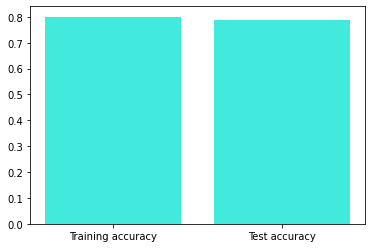

In [ ]:
acc_knn = {'Training accuracy' : np.mean(grid_search_knn.cv_results_['mean_train_score']), 'Test accuracy' : np.mean(grid_search_knn.cv_results_['mean_test_score']) }
print (acc_knn)
plt.bar(*zip(*acc_knn.items()),color = '#42EADDFF')
plt.show()

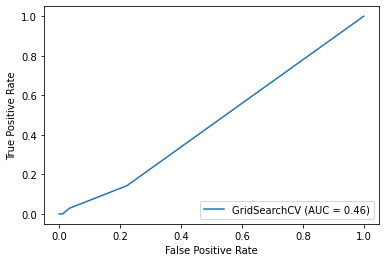

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid_search_knn,X_test,y_test)

Logisitc Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state = 1011)
reg.fit(X_train_scl,y_train)

logreg_train = reg.score(X_train_scl,y_train)
logreg_test = reg.score(X_test_scl,y_test)

y_pred_logreg = reg.predict(X_test_scl)
print(classification_report(y_test, y_pred_logreg))

print("Training set accuracy: {:.2f}".format(logreg_train))
print("Test set accuracy: {:.2f}".format(logreg_test))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        90
           1       0.00      0.00      0.00        35

    accuracy                           0.72       125
   macro avg       0.36      0.50      0.42       125
weighted avg       0.52      0.72      0.60       125

Training set accuracy: 0.78
Test set accuracy: 0.72


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
grid_search_logreg = GridSearchCV(reg,param_grid_logreg,cv=10,return_train_score=True,n_jobs = -1)
grid_search_logreg.fit(X_train_scl,y_train)

print("Train score is "+str(grid_search_logreg.score(X_train_scl,y_train)))
print("Test score is "+str(grid_search_logreg.score(X_test_scl,y_test)))
print("Best parameters:"+str(grid_search_logreg.best_params_))
print("Best grid search score:"+str(grid_search_logreg.best_score_))
print("Best estimator:"+str(grid_search_logreg.best_estimator_))

y_pred_logreg = grid_search_logreg.predict(X_test_scl)
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Train score is 0.7813333333333333
Test score is 0.72
Best parameters:{'C': 0.001}
Best grid search score:0.7787339971550498
Best estimator:LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1011, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[[90  0]
 [35  0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        90
           1       0.00      0.00      0.00        35

    accuracy                           0.72       125
   macro avg       0.36      0.50      0.42       125
weighted avg       0.52      0.72      0.60       125



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Training accuracy': 0.7813337313223183, 'Test accuracy': 0.7787339971550497}


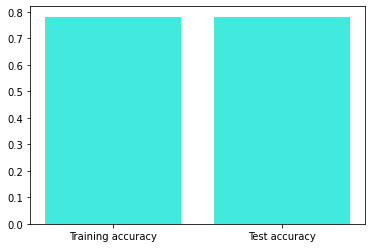

In [ ]:
acc_logreg = {'Training accuracy' : np.mean(grid_search_logreg.cv_results_['mean_train_score']), 'Test accuracy' : np.mean(grid_search_logreg.cv_results_['mean_test_score']) }
print (acc_logreg)
plt.bar(*zip(*acc_logreg.items()),color = '#42EADDFF')
plt.show()

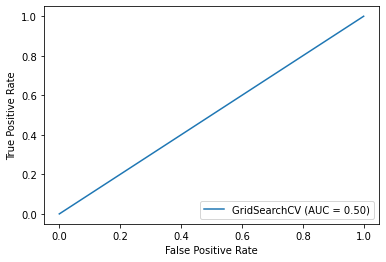

In [ ]:
plot_roc_curve(grid_search_logreg,X_test,y_test)

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 1011)
print (dtc.fit(X_train,y_train))

dtc_train = dtc.score(X_train,y_train) # no scaling required 
dtc_test = dtc.score(X_test,y_test)

y_pred_dtc = dtc.predict(X_test)
print(classification_report(y_test, y_pred_dtc))

print("Training set accuracy: {:.2f}".format(dtc_train))
print("Test set accuracy: {:.2f}".format(dtc_test))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1011, splitter='best')
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        90
           1       0.48      0.40      0.44        35

    accuracy                           0.71       125
   macro avg       0.63      0.62      0.62       125
weighted avg       0.70      0.71      0.70       125

Training set accuracy: 1.00
Test set accuracy: 0.71


In [ ]:
grid_search_dtc = GridSearchCV(dtc, param_grid_dtc, cv=10, return_train_score=True, n_jobs = -1)
grid_search_dtc.fit(X_train,y_train)

print("Train score is "+str(grid_search_dtc.score(X_train,y_train)))
print("Test score is "+str(grid_search_dtc.score(X_test,y_test)))
print("Best parameters:"+str(grid_search_dtc.best_params_))
print("Best grid search score:"+str(grid_search_dtc.best_score_))
print("Best estimator:"+str(grid_search_dtc.best_estimator_))

y_pred_dtc = grid_search_dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

Train score is 0.8426666666666667
Test score is 0.808
Best parameters:{'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_split': 2}
Best grid search score:0.797724039829303
Best estimator:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1011, splitter='best')
[[86  4]
 [20 15]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        90
           1       0.79      0.43      0.56        35

    accuracy                           0.81       125
   macro avg       0.80      0.69      0.72       125
weighted avg       0.81      0.81      0.79       125



{'Training accuracy': 0.8187951761393897, 'Test accuracy': 0.7780464675201517}


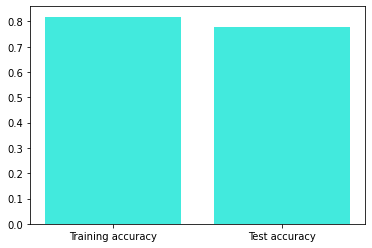

In [ ]:
acc_dtc = {'Training accuracy' : np.mean(grid_search_dtc.cv_results_['mean_train_score']), 'Test accuracy' : np.mean(grid_search_dtc.cv_results_['mean_test_score']) }
print (acc_dtc)
plt.bar(*zip(*acc_dtc.items()),color = '#42EADDFF')
plt.show()

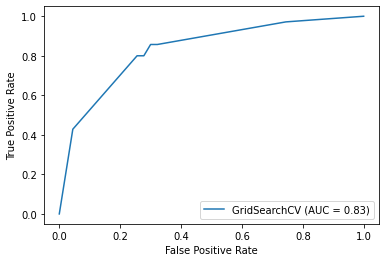

In [ ]:
plot_roc_curve(grid_search_dtc,X_test,y_test)

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 1011, n_jobs = -1)
rfc.fit(X_train,y_train)

y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

print ("Training Score: ",rfc.score(X_train,y_train))
print ("Test Score: ",rfc.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        90
           1       0.58      0.40      0.47        35

    accuracy                           0.75       125
   macro avg       0.69      0.64      0.66       125
weighted avg       0.73      0.75      0.74       125

Training Score:  1.0
Test Score:  0.752


In [ ]:
grid_search_rfc = GridSearchCV(rfc, param_grid_rfc, cv=10, return_train_score=True, n_jobs = -1)
grid_search_rfc.fit(X_train,y_train)

print("Train score is "+str(grid_search_rfc.score(X_train,y_train)))
print("Test score is "+str(grid_search_rfc.score(X_test,y_test)))
print("Best parameters:"+str(grid_search_rfc.best_params_))
print("Best grid search score:"+str(grid_search_rfc.best_score_))
print("Best estimator:"+str(grid_search_rfc.best_estimator_))

y_pred_rfc = grid_search_rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

Train score is 0.8826666666666667
Test score is 0.736
Best parameters:{'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best grid search score:0.8083926031294453
Best estimator:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=1011, verbose=0,
                       warm_start=False)
[[85  5]
 [28  7]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.84        90
           1       0.58      0.20      0.30        35

    accuracy                           0.74       125
   macro avg  

{'Training accuracy': 0.8255516244388649, 'Test accuracy': 0.7861216479637534}


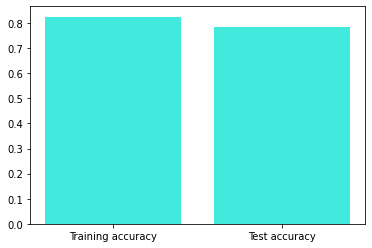

In [ ]:
acc_rfc = {'Training accuracy' : np.mean(grid_search_rfc.cv_results_['mean_train_score']), 'Test accuracy' : np.mean(grid_search_rfc.cv_results_['mean_test_score']) }
print (acc_rfc)
plt.bar(*zip(*acc_rfc.items()),color = '#42EADDFF')
plt.show()

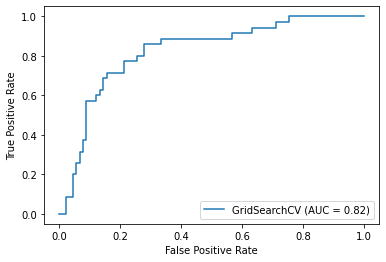

In [ ]:
plot_roc_curve(grid_search_rfc,X_test,y_test)

eXtreme Gradient Boost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 1011, n_jobs = -1)
xgb.fit(X_train,y_train)

print ("Training Score: ",xgb.score(X_train,y_train))
print ("Test Score: ",xgb.score(X_test,y_test))

Training Score:  0.9306666666666666
Test Score:  0.728


In [ ]:
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=10, return_train_score=True, n_jobs = -1)
grid_search_xgb.fit(X_train,y_train)

print("Train score is "+str(grid_search_xgb.score(X_train,y_train)))
print("Test score is "+str(grid_search_xgb.score(X_test,y_test)))
print("Best parameters:"+str(grid_search_xgb.best_params_))
print("Best grid search score:"+str(grid_search_xgb.best_score_))
print("Best estimator:"+str(grid_search_xgb.best_estimator_))

y_pred_xgb = grid_search_xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Train score is 0.944
Test score is 0.76
Best parameters:{'eta': 0.2, 'gamma': 1, 'max_depth': 5}
Best grid search score:0.8136557610241821
Best estimator:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=1011,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
[[79 11]
 [19 16]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        90
           1       0.59      0.46      0.52        35

    accuracy                           0.76       125
   macro avg       0.70      0.67      0.68       125
weighted avg       0.75      0.76      0.75       125



{'Training accuracy': 0.9063052965700764, 'Test accuracy': 0.7962620515252093}


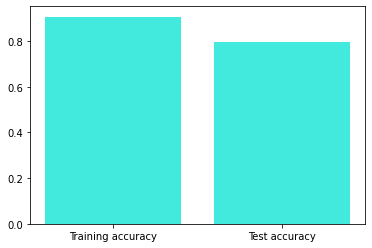

In [ ]:
acc_xgb = {'Training accuracy' : np.mean(grid_search_xgb.cv_results_['mean_train_score']), 'Test accuracy' : np.mean(grid_search_xgb.cv_results_['mean_test_score']) }
print (acc_xgb)
plt.bar(*zip(*acc_xgb.items()),color = '#42EADDFF')
plt.show()

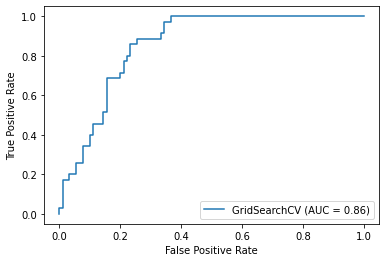

In [ ]:
plot_roc_curve(grid_search_xgb,X_test,y_test)

## Combining and plotting the average accuracies returned by GridSearch for all the models

In [ ]:
#creating a Dataframe from all the dictionaries above
acc = pd.DataFrame([acc_knn,acc_logreg,acc_dtc,acc_rfc,acc_xgb] , index = ['kNN','Logistic Regression','Decision Tree','Random Forest','XGBoost'])

#acc = pd.DataFrame([acc_knn,acc_logreg,acc_svm,acc_dtc,acc_rfc,acc_xgb] , index = ['kNN','Logistic Regression','SVM','Decision Tree','Random Forest','XGBoost'])

In [ ]:
acc

,Training accuracy,Test accuracy
kNN,0.800267,0.788450
Logistic Regression,0.781334,0.778734
Decision Tree,0.818795,0.778046
Random Forest,0.825552,0.786122
XGBoost,0.906305,0.796262


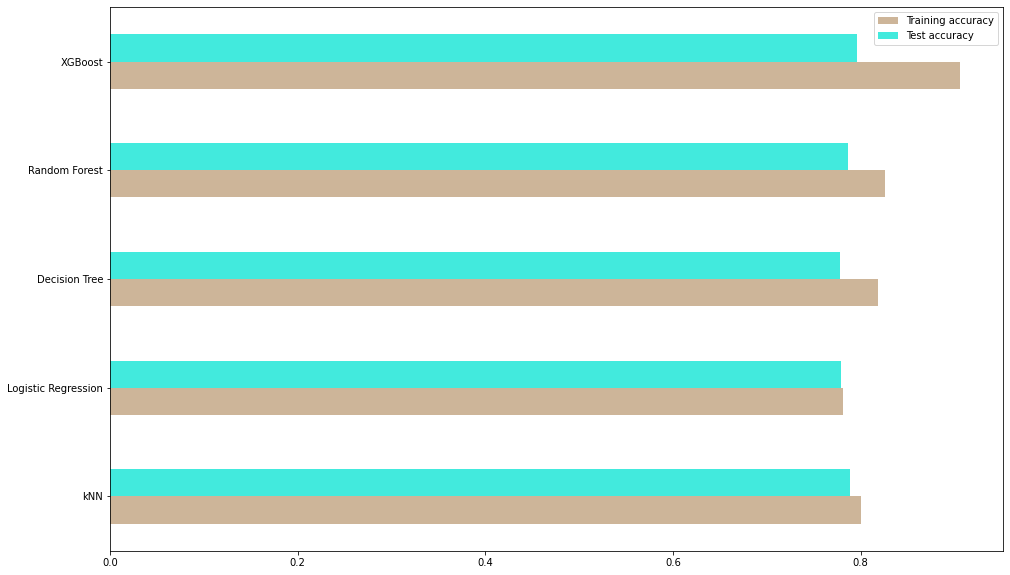

In [ ]:
acc.plot(kind = 'barh', figsize = (16,10),color = ["#CDB599FF", "#42EADDFF"])